## Import the essential libraries
Lets import the essential libraries

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
custom={
    'xtick.bottom': True,
    'ytick.left': True,
    'grid.color': 'gray',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': 'gray'
}
sns.set_theme(style='darkgrid',rc=custom)


## Loading the dataset

In [152]:
data=pd.read_csv('dataset_assignment1.csv') # Dataset is loaded onto a pandas dataframe

Lets look at the first 5 rows to see what the data looks like.

In [153]:
data.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Descriptive Statistics / Exploratory Data Analysis

### Data types

It is useful to analyse and understand the data that we will be dealing with along with the data types.

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


From the above we can see that all the features are populated, they are of the same type (int) and there are no missing values.

Lets now look at the number of samples for each class in the dataset

Class Counts:
class
0    459
1    241
Name: count, dtype: int64


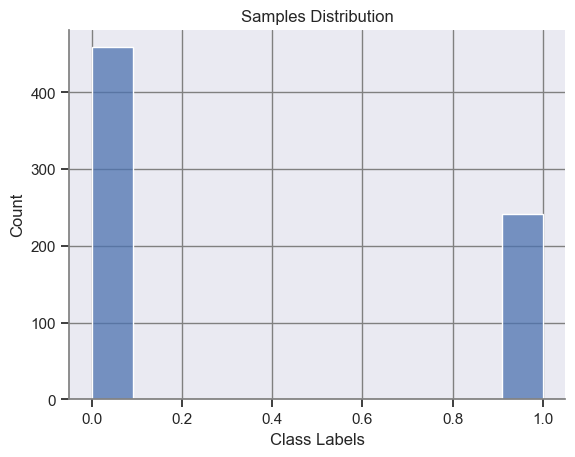

In [155]:
class_count = data['class'].value_counts()
print("Class Counts:")
print(class_count)

# Plotting the data
sns.histplot(data['class'])
plt.title("Samples Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

The dataset is not balanced as the positive and negative classes does not have equal number of samples. With few positives (1) relative to negatives (0), the training model will spend most of its time on negative examples and not learn enough from positive ones.

### Statistics
Checking some statistics of the entire dataset


In [156]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,4.415714,3.131429,3.204286,2.804286,3.214286,3.557143,3.437143,2.864286,1.588571,0.344286
std,2.814236,3.050343,2.970958,2.854153,2.213193,3.613026,2.436676,3.052265,1.713995,0.475475
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Lets analyse the statistics of the samples for each class

In [157]:
for class_label in data['class'].unique():
    class_data = data[data['class'] == class_label]
    print(f"Statistics for class {class_label}:")
    print(class_data.describe())

Statistics for class 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.000000    1.000000    1.000000 

Here we can see the statistical description of all the features based on the class label. For the samples under class '1' the standard deviation is high (>2). It indicates that there is a lot of variance in the observed data around the mean and that the data observed is quite spread out.

## Data Visualization

Ploting a few features to visualise how the data is scattered.

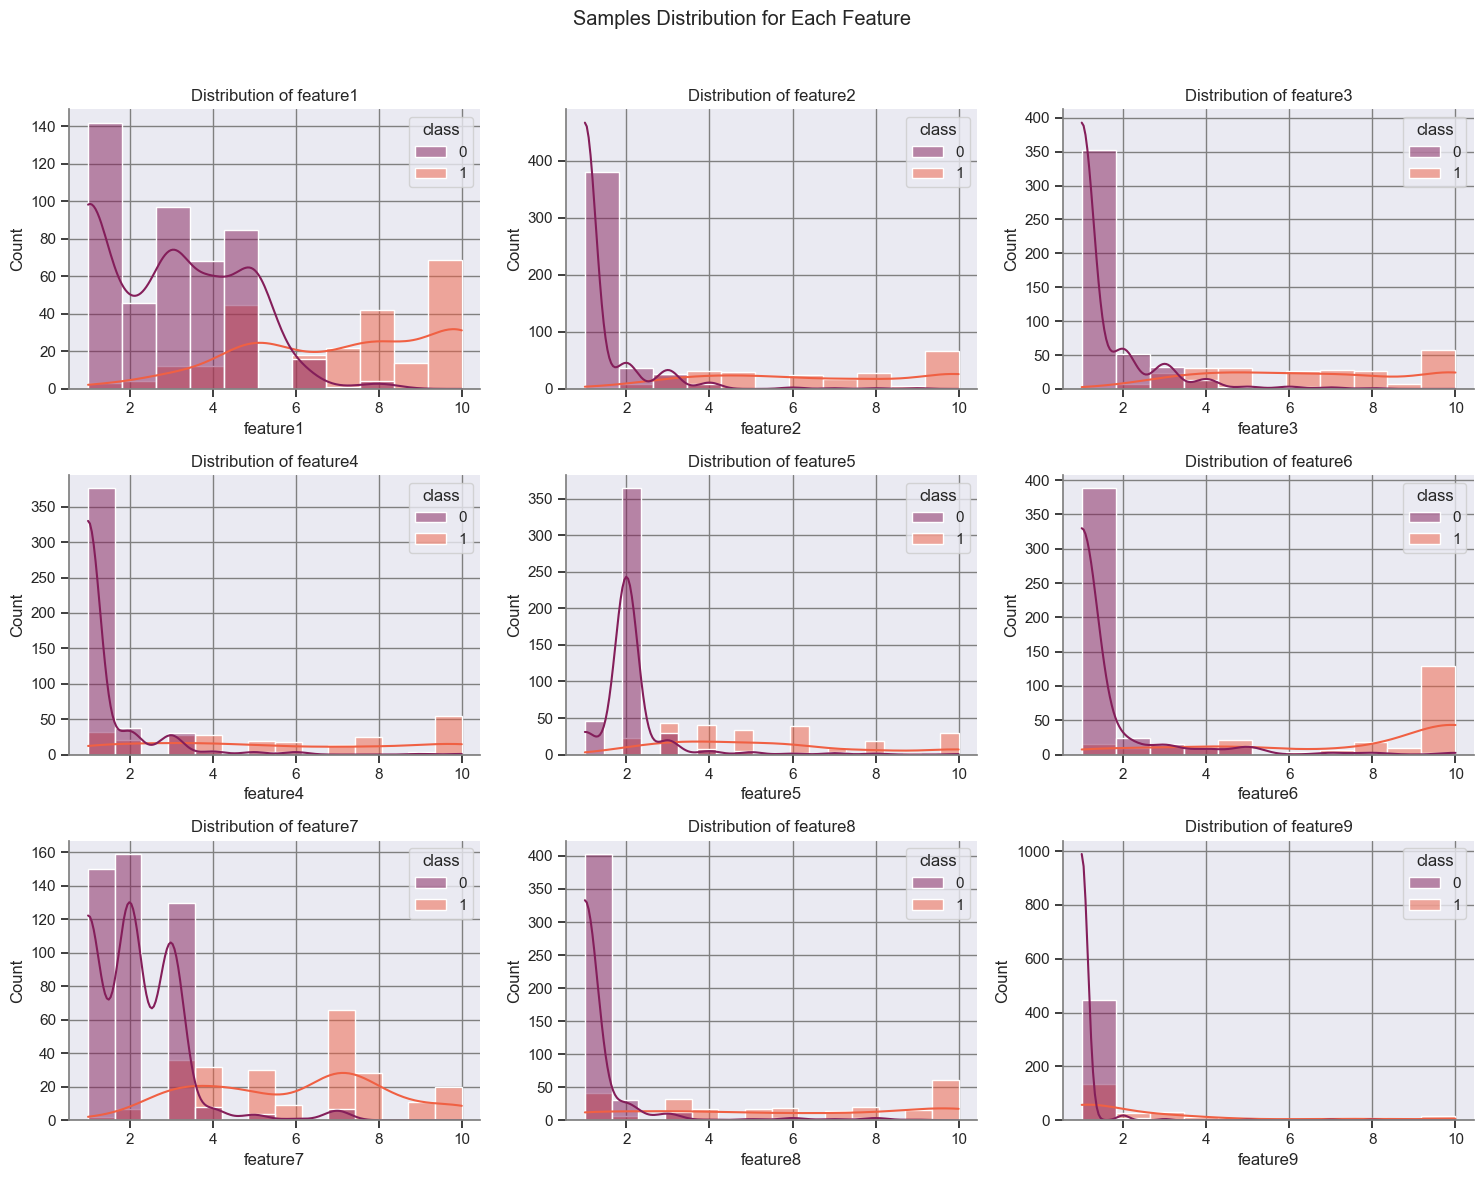

In [227]:
fig, axes = plt.subplots(3,3, figsize=(15, 12))
fig.suptitle('Samples Distribution for Each Feature')

# Flatten the 2D array of subplots for easy indexing
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(data.columns[:-1]):
    sns.histplot(data=data, x=feature, hue='class', kde=True, ax=axes[i],palette='rocket')
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Model Analysis
### Train - Test Split

In order for training the models, we split the data set into training and test in 80-20 % split

In [161]:
from sklearn.model_selection import train_test_split

x = data.drop('class',axis=1)
y = data['class']
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=6) # 80 - 20 spit
print('X Train', x_train)

X Train      feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
51          5         3         3         4         2         4         3   
56          8        10        10         1         3         6         3   
15          7         4         6         4         6         1         4   
383         2         1         1         1         2         1         1   
7           2         1         2         1         2         1         3   
..        ...       ...       ...       ...       ...       ...       ...   
362         3         2         2         1         4         3         2   
335         1         1         1         1         2         1         1   
365         2         1         1         1         2         1         2   
618         4         1         1         1         2         1         2   
227         8         9         9         5         3         5         7   

     feature8  feature9  
51          4         1  
56          9  

# Choosing the models.
 We are choosing the following 3 models:
1. K Nearest Neighbours (KNN) 
2. Logistic Regression
3. Random Forest
    

### 1. KNN
Importing the esseantial libraries

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


To choose the hyperparameter 'k' we are performing 5-fold cross-validation to get the k with the better accuracy/precision/recall/f1-score.

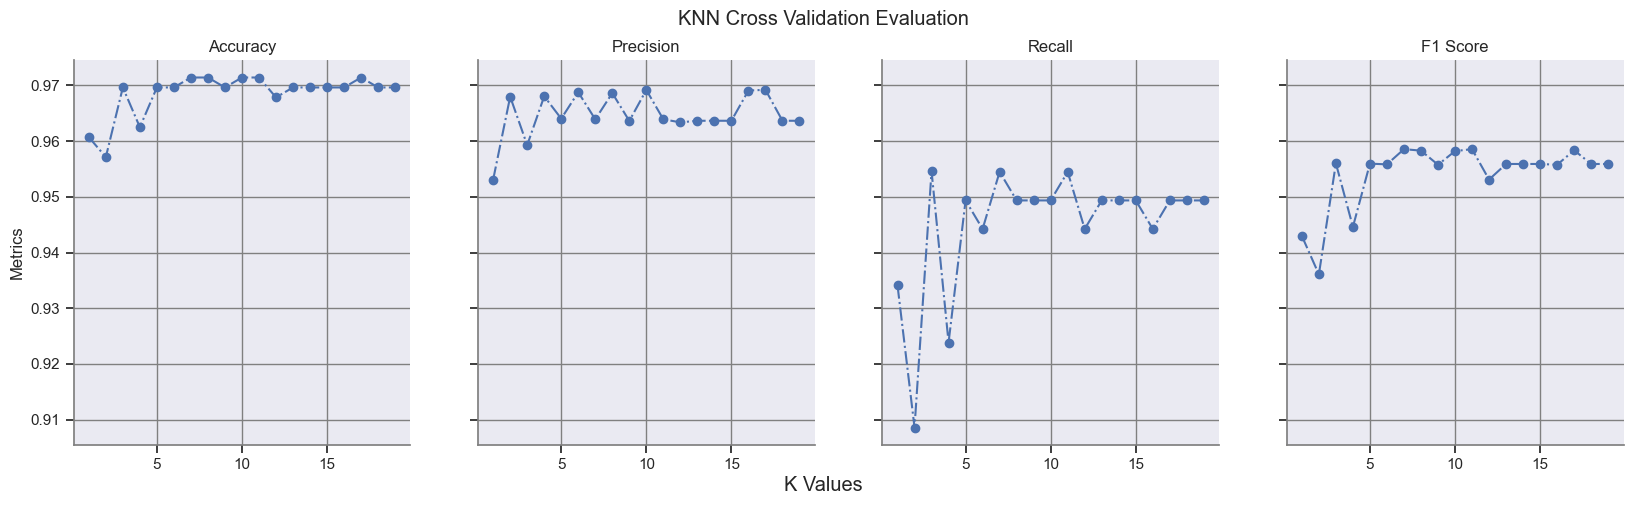

K Accuracy: [6, 10, 16]
K Precision: [16]
K Recall: [2]
K F1-Score: [6, 10]


In [209]:
k_range = range(1,20)
k_accuracy = []
k_precision = []
k_recall = []
k_f1score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Accuracy
    accuracy_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    k_accuracy.append(accuracy_scores.mean())

    # Precision
    precision_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='precision')
    k_precision.append(precision_scores.mean())

    # Recall
    recall_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='recall')
    k_recall.append(recall_scores.mean())

    # F1 Score
    f1_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='f1')
    k_f1score.append(f1_scores.mean())
    
# Ploting the graphs
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('KNN Cross Validation Evaluation')
fig.supxlabel('K Values')

ax1.plot(k_range, k_accuracy, ls='-.', marker='o', label='Accuracy')
ax1.set_title('Accuracy')
ax1.set_ylabel('Metrics')

ax2.plot(k_range, k_precision, ls='-.', marker='o', label='Precision')
ax2.set_title('Precision')

ax3.plot(k_range, k_recall, ls='-.', marker='o', label='Recall')
ax3.set_title('Recall')

ax4.plot(k_range, k_f1score, ls='-.', marker='o', label='F1 Score')
ax4.set_title('F1 Score')

plt.show()

# Max metrics scores
metrics = [('K Accuracy', k_accuracy), ('K Precision', k_precision), ('K Recall', k_recall), ('K F1-Score', k_f1score)]
for metric_name, metric_values in metrics:
    max_metric_value = max(metric_values)
    indices_with_max_value = [i for i, j in enumerate(metric_values) if j == max_metric_value] # Returns the indices with max scores
    print(f'{metric_name}: {indices_with_max_value}')


From cross validation on the 4 parameters, k value of 16 will give the best model with high accuracy and precision, hence we choose k = 16. A reduction in recall is also noted here as it is a tradeoff of choosing a high precision model.

In [164]:
knn = KNeighborsClassifier(16, weights='uniform', p=2) # k of 16 with euclidian distance model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

### Testing the model
Once the model has been trained, we test the model on the testing dataset. 

In [165]:
y_pred_knn = knn.predict(x_test) # Tests the model
y_pred_knn

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

### Confusion Matrix
A confusion matrix lets us visualy analyse how efficiently the model has classified the testing data based on its learned parameters after training.

In [166]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
(tn, fp, fn, tp)

(91, 4, 4, 41)

It gave us the values like: True Negative, False Postituve, False Negative & True Positive. As stated above since the dataset is unbalanced, the  training model soent most of its time on negative examples and did not learn enough from positive ones.

Lets plot these values to visualise the confusion matrix

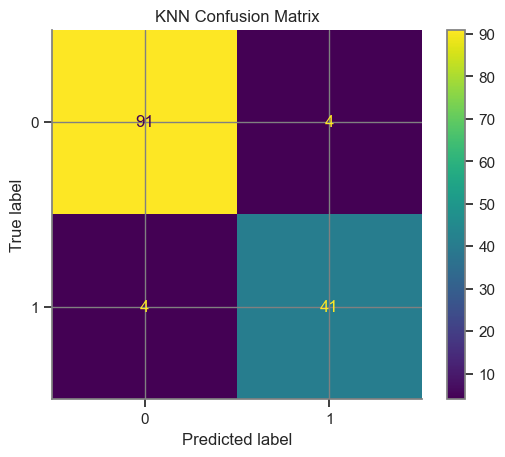

In [205]:
cm = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('KNN Confusion Matrix')
plt.show()

Checking the accuracy of the model

In [168]:
score = accuracy_score(y_test,y_pred_knn)
score

0.9428571428571428

Eventhough this model gave us an accuracy of 94% we have to check for other parameters to better understand the efficinecy of the model. We further calculate the other performance metrics.

In [169]:
report1 = classification_report(y_test, y_pred_knn)
print(report1)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.91      0.91      0.91        45

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140



From the report we can see that our model has a high precision,recall and f1 score.

## 2. Logistic Regression
We use a logistic regression model with default parameters for our second model.

In [170]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(fit_intercept=True)
log.fit(x_train,y_train)

LogisticRegression()

### Testing the model

In [171]:
y_pred_log = log.predict(x_test)
y_pred_log

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

### Confusion Matrix

We perform the same evalution steps as done before i.e ploting the confusion matric and checking the accuracy ,precision and recall of the model.

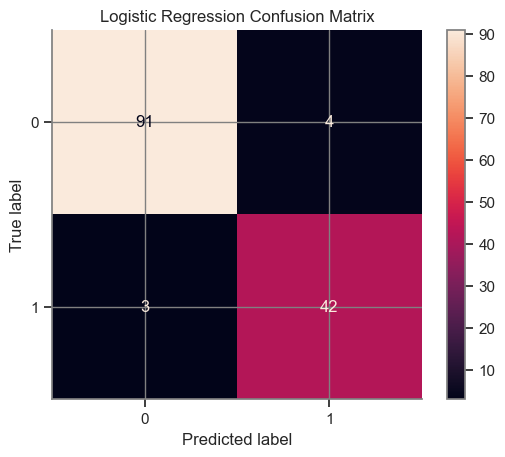

[[91  4]
 [ 3 42]]


In [210]:
cm = confusion_matrix(y_test, y_pred_log)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='rocket')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [173]:
report2 = classification_report(y_test, y_pred_log)
print(report2)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        95
           1       0.91      0.93      0.92        45

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



# 3. Random Forest
To choose the no: of trees in the random forest model we are performing 5-fold cross-validation to get the best no: of tress based on accuracy alone.

In [180]:
from sklearn.ensemble import RandomForestClassifier

est_range = range(1, 100)
est_accuracy = []

# Validating across thw est_range and checking the accuracy score for each iteration.
for est in est_range:
    tree = RandomForestClassifier(n_estimators=est)
    scores = cross_val_score(tree, x_train, y_train, cv=5, scoring='accuracy') # Evaluates the score by cross validation (k=5).
    est_accuracy.append(scores.mean())  
max_acc = max(est_accuracy)

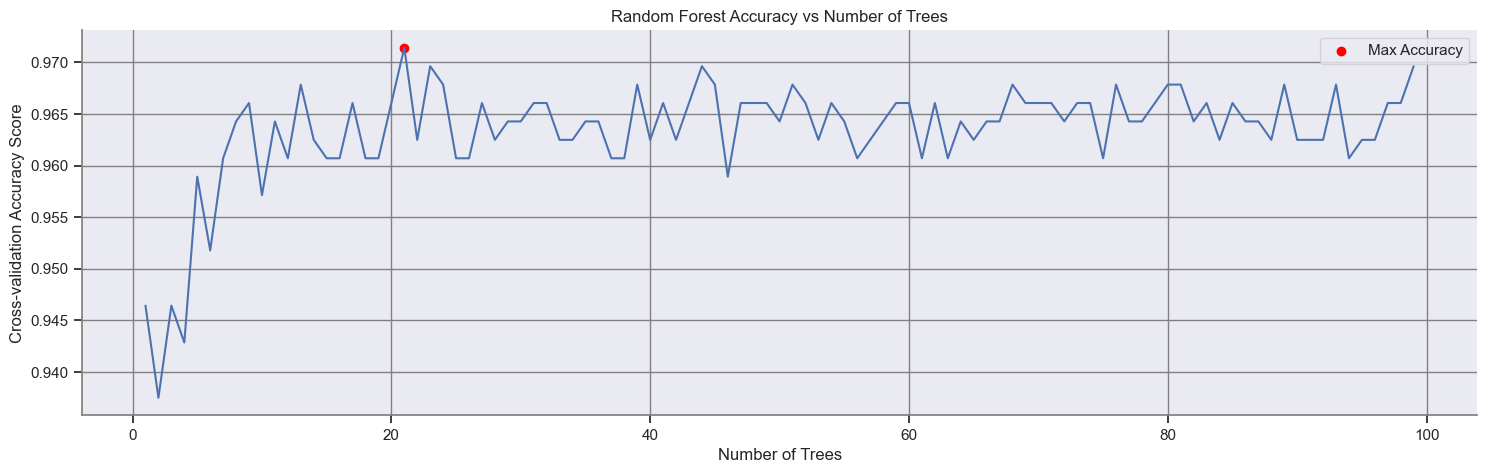

Indices with Maximum Accuracy: [20]


In [182]:
#Plotting the results
plt.figure(figsize=(18,5))
plt.plot(est_range, est_accuracy)
plt.scatter(est_range[est_accuracy.index(max_acc)], max_acc, color='red', label='Max Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-validation Accuracy Score')
plt.title('Random Forest Accuracy vs Number of Trees')
plt.legend()
plt.show()

print(f"Indices with Maximum Accuracy: {[i for i, j in enumerate(est_accuracy) if j == max_acc]}") # Prints the indices with highest score

## Model Training
Based on the validation, we assign the index with max value for accuracy as our hyperparameter of our model


In [183]:
tree = RandomForestClassifier(n_estimators=est_accuracy.index(max_acc)) # no: of tress as hyperparameter
tree.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

## Testing the model

In [184]:
y_pred_tree = tree.predict(x_test)
y_pred_tree

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

## Confusion Matrix

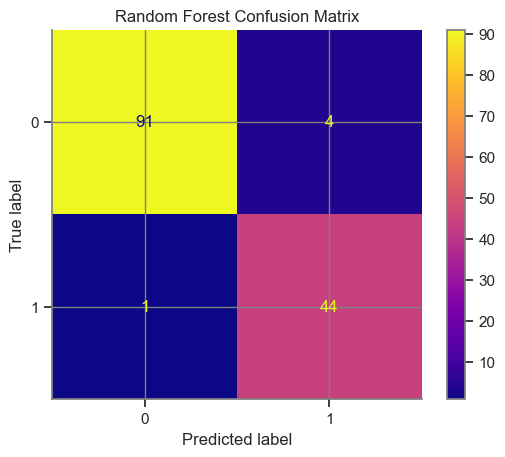

In [207]:
cm = confusion_matrix(y_test, y_pred_tree)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=('plasma'))
plt.title('Random Forest Confusion Matrix')
plt.show()

In [186]:
report3 = classification_report(y_test, y_pred_tree)
print(report3)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        95
           1       0.92      0.98      0.95        45

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



# Performance Comparison
Lets now plot and see the performace of the 3 models on the metrics such as accuracy, precision, recall and f1-score.


In [187]:
report1 = classification_report(y_test,y_pred_knn,output_dict=True)
report2 = classification_report(y_test,y_pred_log,output_dict=True)
report3 = classification_report(y_test,y_pred_tree,output_dict=True)

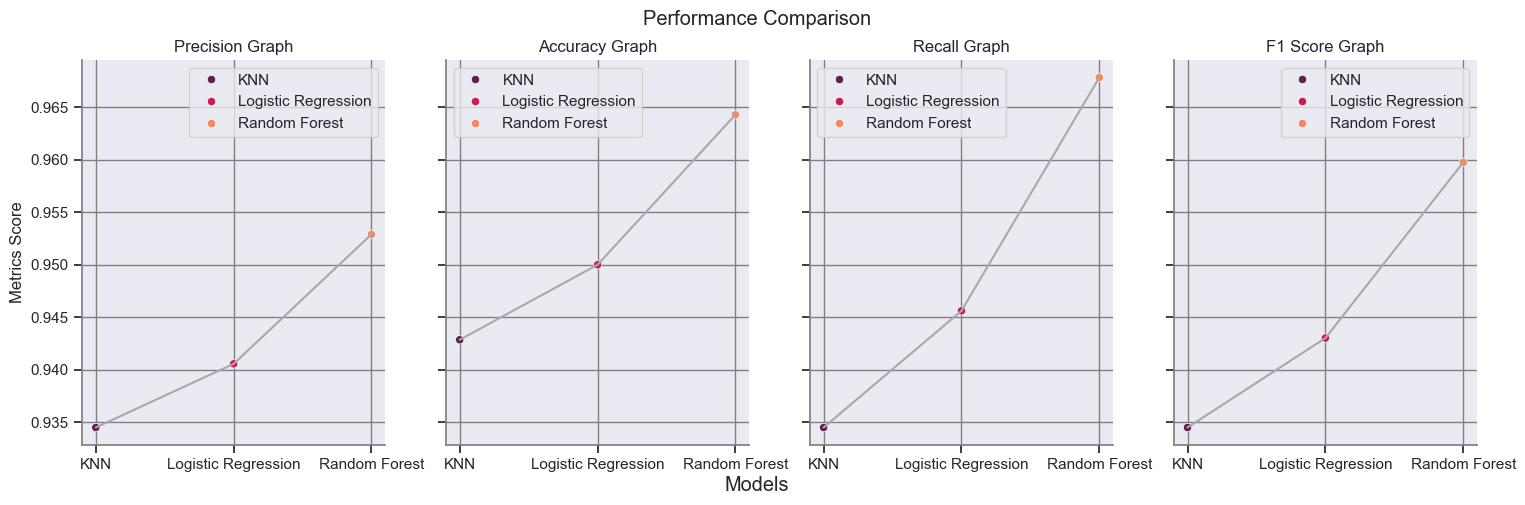

In [208]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,5),sharey=True)
fig.suptitle("Performance Comparison")
fig.supxlabel('Models')
# Storing all the metrics for plotting.
models = ['KNN','Logistic Regression','Random Forest']
precisions = [report1['macro avg']['precision'],report2['macro avg']['precision'],report3['macro avg']['precision']]
accuracy = [report1['accuracy'],report2['accuracy'],report3['accuracy']]
recall = [report1['macro avg']['recall'],report2['macro avg']['recall'],report3['macro avg']['recall']]
f1_score = [report1['macro avg']['f1-score'],report2['macro avg']['f1-score'],report3['macro avg']['f1-score']]

# Plotting the results
sns.scatterplot(ax=ax1, x=models,y=precisions, hue=models,palette='rocket')
ax1.plot(models,precisions, c='darkgrey')
ax1.set_title('Precision Graph')
ax1.set_ylabel('Metrics Score')

sns.scatterplot(ax=ax2, x=models,y=accuracy, hue=models,palette='rocket')
ax2.plot(models,accuracy, c='darkgrey')
ax2.set_title('Accuracy Graph')

sns.scatterplot(ax=ax3, x=models,y=recall, hue=models,palette='rocket')
ax3.plot(models,recall, c='darkgrey')
ax3.set_title('Recall Graph')

sns.scatterplot(ax=ax4, x=models,y=f1_score, hue=models,palette='rocket')
ax4.plot(models,f1_score, c='darkgrey')
ax4.set_title('F1 Score Graph')

plt.legend()
plt.show()

Based on the perfomance comparison of the 3 models on metrics such as accuracy,precision,recall and f1-score, the Random Forest Model gave the best result in all the 4 evaluation metrics while the KNN model gave the worst result comparitively. It can also be seen that on choosing a high accuracy K from cross validation of the random forest model, the recall was high with a tradeoff of the precision. 

# Feature Engineering
It is useful to look at how correlated all of the features are within our dataset.It reveals the linear relationships between features. We want features to correlate with the class, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, we want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (class). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

Hence we check how the features are correlated with each other

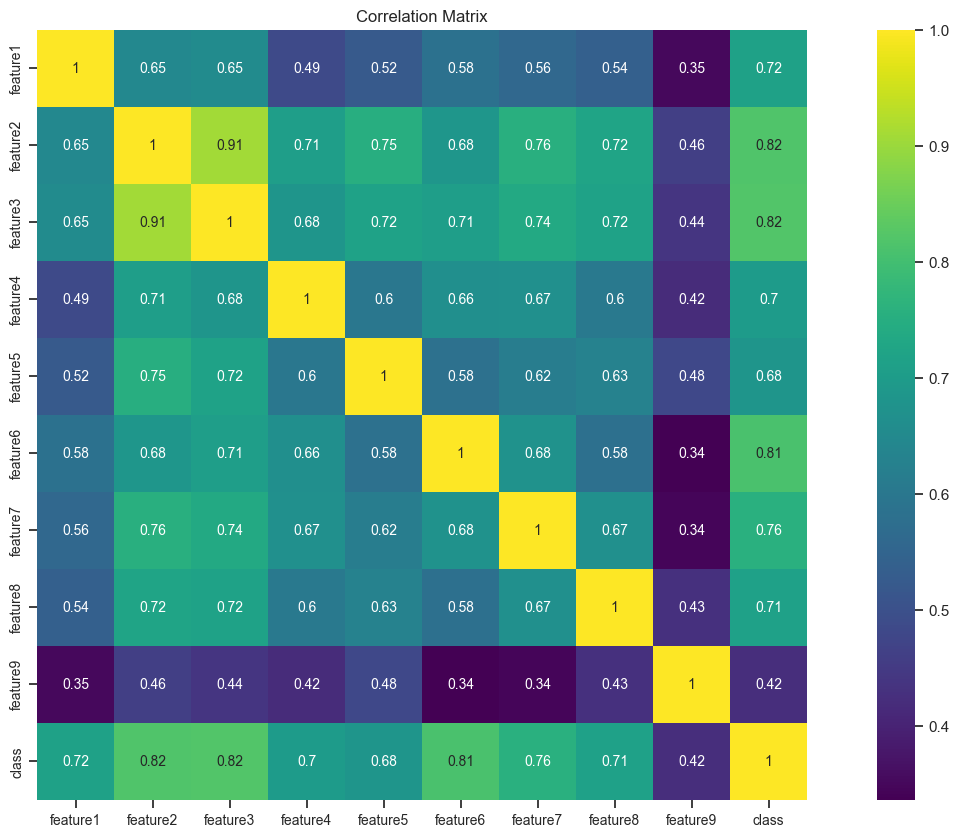

In [219]:
correlation = data.corr()
# Plot correlation
plt.figure(figsize=(18, 10))
ax = sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    cmap='viridis',
    annot=True, 
    annot_kws={'size': 10},
    square=True
)
# Axis ticks size
plt.title('Correlation Matrix')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation heatmap we see that 'feature2' and 'feature3' are highly correlated to each other. On removing one of the feature we do not loose information and the model will still be relevant.

In [213]:
data_new = data.drop(columns=['feature2'])
data_new.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0


# Feature Scaled Model
Let's now evaluate the scaled dataset where we removed a feature (feature2) to check whether the reduction in dimension had an effect on the accuracy or other metrics of the model or not. 

We do the exact steps as before i.e spliting the data into train-test split and then training the model on the training set. We then test the model on the test set and check for performance metrics.

In [214]:
x_new = data_new.drop('class',axis=1)
y_new = data_new['class']
x_train_new, x_test_new ,y_train_new, y_test_new = train_test_split(x_new,y_new,test_size=0.2, random_state=9) # 80 - 20 spit

### We will pick our 'Random Forest Model' with the exact hyperparameter (no; of tress) and train on this new reduced dataset.

In [194]:
tree_new = RandomForestClassifier(n_estimators=est_accuracy.index(max_acc)) # no: of tress as hyperparameter
tree_new.fit(x_train_new,y_train_new)

RandomForestClassifier(n_estimators=20)

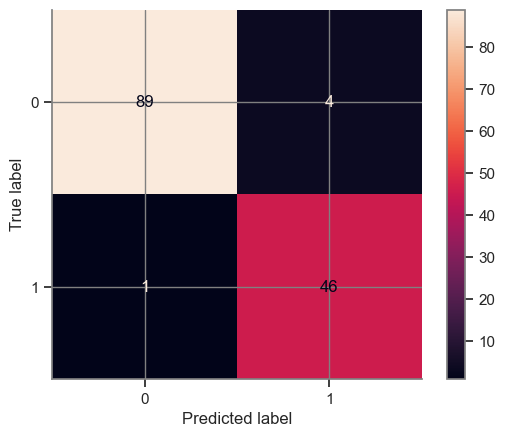

In [195]:
# Plotting the confusion matrix
y_predtree_new = tree_new.predict(x_test_new)
cm = confusion_matrix(y_test_new, y_predtree_new)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=('rocket'))

In [196]:
report4 = classification_report(y_test_new, y_predtree_new)
print(report4)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        93
           1       0.92      0.98      0.95        47

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



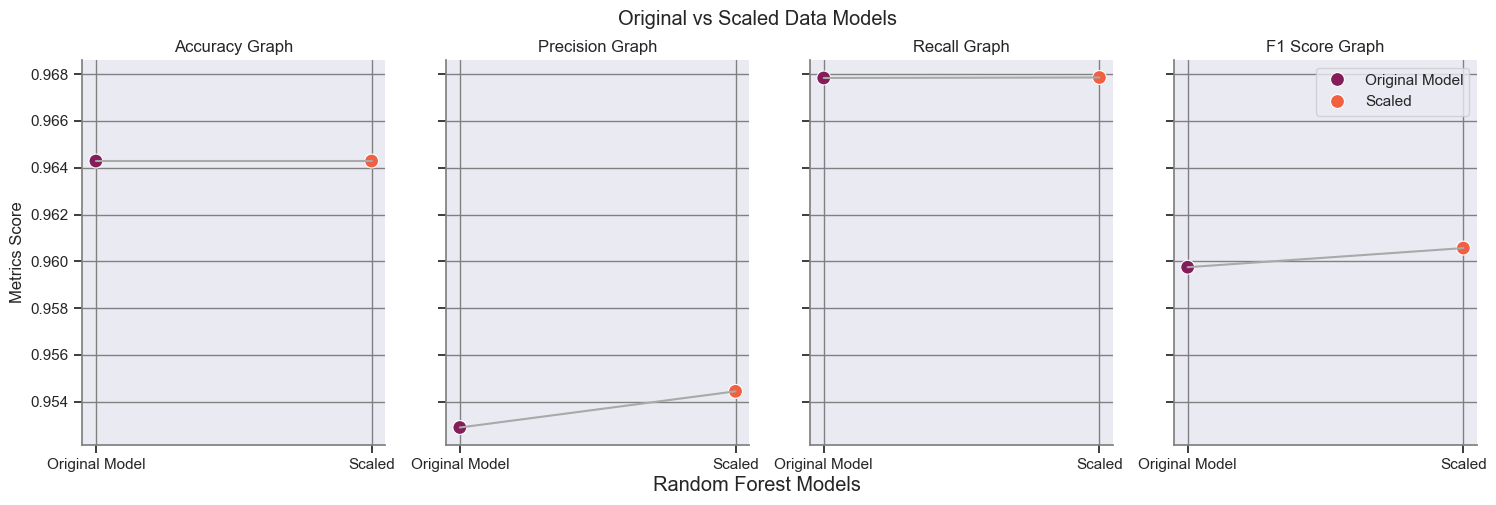

In [203]:
report4 = classification_report(y_test_new, y_predtree_new, output_dict=True) # Storing the performance metrics for plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(18,5),sharey=True)
fig.suptitle("Original vs Scaled Data Models")
fig.supxlabel('Random Forest Models')

models=['Original Model', 'Scaled']
accuracy = [report3['accuracy'],report4['accuracy']]
precisions = [report3['macro avg']['precision'],report4['macro avg']['precision']]
recall = [report3['macro avg']['recall'],report4['macro avg']['recall']]
f1_score = [report3['macro avg']['f1-score'],report4['macro avg']['f1-score']]

# Plotting the results
sns.scatterplot(ax=ax1, x=models,y=accuracy, hue=models,palette='rocket',legend=None, s=100)
ax1.plot(models,accuracy, c='darkgrey')
ax1.set_title('Accuracy Graph')
ax1.set_ylabel('Metrics Score')

sns.scatterplot(ax=ax2, x=models,y=precisions, hue=models,palette='rocket',legend=None,s=100)
ax2.plot(models,precisions, c='darkgrey')
ax2.set_title('Precision Graph')

sns.scatterplot(ax=ax3, x=models,y=recall, hue=models,palette='rocket',legend=None,s=100)
ax3.plot(models,recall, c='darkgrey')
ax3.set_title('Recall Graph')

sns.scatterplot(ax=ax4, x=models,y=f1_score, hue=models,palette='rocket',s=100)
ax4.plot(models,f1_score, c='darkgrey')
ax4.set_title('F1 Score Graph')

plt.legend()
plt.show()

From the performance comparison it can be seen that the reduced dataset is on par with or even better that the original dataset. With the same accuracy and recall, increased precision and F1-score, the reduced data model is efficient when it comes to computing power and time. For datasets with high dimensionality, adopting normalization techniques like feature scaling or dimensionality reduction can improve computing efficiency with negligible difference in performance metrics. 